In [25]:
import yfinance as yf
import pandas as pd
import finance_calculator as fc
import numpy as np
import pyfolio as pf
import empyrical as em
from empyrical import max_drawdown, alpha_beta
from empyrical import roll_max_drawdown
from empyrical import roll_up_capture, capture
import datapackage as dp
import requests
import bs4 as bs
import hvplot.pandas


In [26]:

# 
resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
soup = bs.BeautifulSoup(resp.text, 'lxml')
table = soup.find('table', {'class': 'wikitable sortable'})

In [27]:
tickers = []
#date_first_added = []
for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text
        #date = row.findAll('td')[6].text - wikipedia removed ate first added column will no loner pull this
        #fourth element is the sector
        
        
        tickers.append(ticker)
        #date_first_added.append(date)

In [28]:

#We can get rid of the n at the of the ticker by using map, lambda and strip:
tickers = list(map(lambda s: s.strip(), tickers))

In [29]:
ticker_df = pd.DataFrame(tickers, columns=['ticker'])
#date_first_added_df = pd.DataFrame(date_first_added, columns=['date first added'])

#ticker_date_df = pd.concat([ticker_df, date_first_added_df], axis=1,)

#ticker_date_df.head()
#date_first_added

In [30]:
#isolate comapanies with data dating back to at least Jan 1st 2018 using loc and conditional statement
#random_stock_pool = ticker_date_df.loc[ticker_date_df['date first added'] < '2018-01-01']
#random_stock_pool.reset_index(inplace=True)
#random_stock_pool

In [31]:

random_stock_pool_tickers = ticker_df
#random_stock_pool_tickers.count()

In [32]:
# Market Index Informations and pull their historical closing price since January 2018
start = "2010-01-01"
sp500 = yf.Ticker("^GSPC")
sp500_data = sp500.history(start= start, actions=False)
sp500_data.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)

In [33]:

#generate 10 random integers from 0 - 499 to serve as our randomly created portfolio
high = random_stock_pool_tickers.count()
index_numbers = np.random.randint(low=0, high=high, size=10)
print(index_numbers)

[182 361 179 273 375 412 251 157 145 238]


In [34]:
#isloate ticker symbols using loc function
random_portfolio_tickers = random_stock_pool_tickers.loc[index_numbers].reset_index()
random_portfolio_tickers

,index,ticker
0,182,RE
1,361,PKG
2,179,ETSY
3,273,KEYS
4,375,PXD
5,412,SLB
6,251,ICE
7,157,DOW
8,145,DXCM
9,238,HWM


In [35]:

# pull data for 10 randomly genereated stocks 
random_stock_0 = yf.Ticker(random_portfolio_tickers["ticker"][0])
random_stock_1 = yf.Ticker(random_portfolio_tickers["ticker"][1])
random_stock_2 = yf.Ticker(random_portfolio_tickers["ticker"][2])
random_stock_3 = yf.Ticker(random_portfolio_tickers["ticker"][3])
random_stock_4 = yf.Ticker(random_portfolio_tickers["ticker"][4])
random_stock_5 = yf.Ticker(random_portfolio_tickers["ticker"][5])
random_stock_6 = yf.Ticker(random_portfolio_tickers["ticker"][6])
random_stock_7 = yf.Ticker(random_portfolio_tickers["ticker"][7])
random_stock_8 = yf.Ticker(random_portfolio_tickers["ticker"][8])
random_stock_9 = yf.Ticker(random_portfolio_tickers["ticker"][9])

random_stock_0_data = random_stock_0.history(start = start, actions =False)
random_stock_1_data = random_stock_1.history(start = start, actions =False)
random_stock_2_data = random_stock_2.history(start = start, actions =False)
random_stock_3_data = random_stock_3.history(start = start, actions =False)
random_stock_4_data = random_stock_4.history(start = start, actions =False)
random_stock_5_data = random_stock_5.history(start = start, actions =False)
random_stock_6_data = random_stock_6.history(start = start, actions =False)
random_stock_7_data = random_stock_7.history(start = start, actions =False)
random_stock_8_data = random_stock_8.history(start = start, actions =False)
random_stock_9_data = random_stock_9.history(start = start, actions =False)

random_stock_0_data.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)
random_stock_1_data.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)
random_stock_2_data.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)
random_stock_3_data.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)
random_stock_4_data.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)
random_stock_5_data.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)
random_stock_6_data.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)
random_stock_7_data.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)
random_stock_8_data.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)
random_stock_9_data.drop(columns=["Open", "High", "Low", "Volume"], inplace=True)

#Combine into single df
random_portfolio = pd.concat([random_stock_0_data, 
           random_stock_1_data, 
           random_stock_2_data, 
           random_stock_3_data, 
           random_stock_4_data, 
           random_stock_5_data, 
           random_stock_6_data, 
           random_stock_7_data, 
           random_stock_8_data, 
           random_stock_9_data], 
           axis="columns", join="inner").reset_index()

random_portfolio.set_index('Date', inplace=True)

In [36]:
daily_returns = random_portfolio.pct_change()
daily_returns

,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close
Date,,,,,,,,,,
2019-03-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-21,0.016655,0.018449,0.007837,0.013548,0.007962,-0.001581,0.002596,-0.016466,-0.027367,0.006289
2019-03-22,-0.002274,-0.031854,-0.049251,-0.031646,-0.034549,-0.039575,-0.008584,-0.007758,-0.092361,-0.025000
2019-03-25,-0.000884,0.000631,0.027870,0.000236,-0.004482,0.000000,0.014019,0.011317,-0.038363,-0.006410
2019-03-26,0.003166,0.029100,-0.001768,0.006841,0.022440,0.013657,0.002846,-0.006104,-0.025226,0.010753
...,...,...,...,...,...,...,...,...,...,...
2021-09-30,-0.008931,-0.027868,0.012957,-0.015579,-0.022255,-0.022750,-0.017793,-0.021421,0.002346,-0.022250
2021-10-01,0.004984,0.012442,-0.017263,0.006878,0.049066,0.024292,0.005051,0.017721,0.005596,0.039423
2021-10-04,-0.006428,0.001797,-0.027646,-0.025753,0.024559,0.017128,-0.006066,-0.005804,-0.042715,-0.016960


In [37]:
# calculate daily returns of portfolio assuming equal with (0.1) into each stock
weights = [.1,.1,.1,.1,.1,.1,.1,.1,.1,.1]

random_portfolio_returns = daily_returns.dot(weights)
random_portfolio_returns.head()

Date
2019-03-20         NaN
2019-03-21    0.002792
2019-03-22   -0.032285
2019-03-25    0.000393
2019-03-26    0.005570
dtype: float64

In [38]:
# calucluate daily returnsd of S&P 500 then join with random portfolio returns

sp_daily_returns = sp500_data.pct_change()

sp_vs_random_returns = pd.concat([random_portfolio_returns, sp_daily_returns], axis="columns", join="inner")
sp_vs_random_return_columns = ["Random Portfolio","S&P 500"]
sp_vs_random_returns.columns=(sp_vs_random_return_columns)

<AxesSubplot:xlabel='Date'>

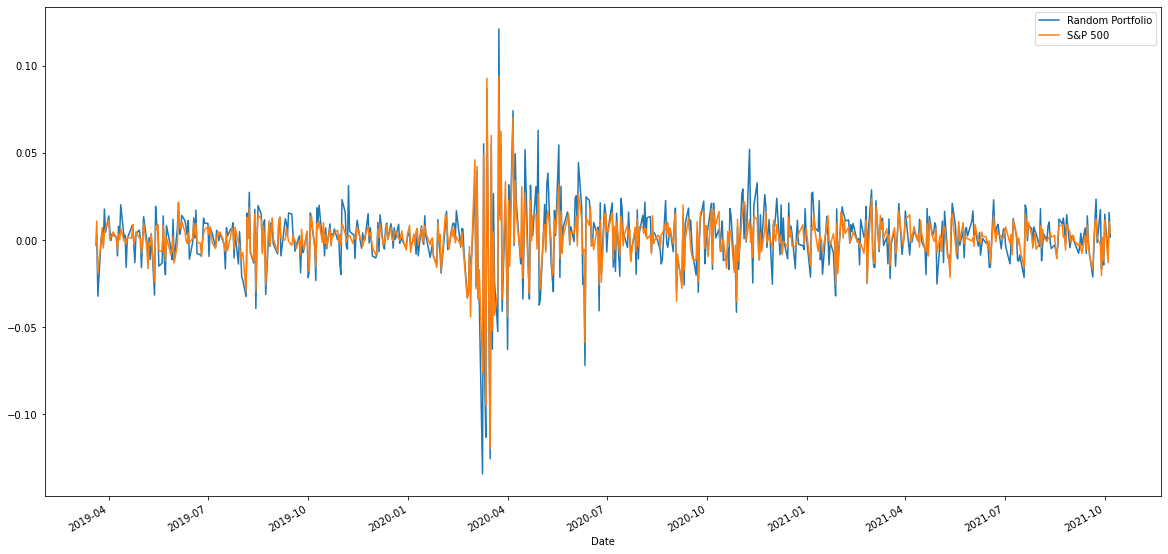

In [39]:
sp_vs_random_returns.plot(figsize = (20, 10))

In [40]:
growth_of_10k = 10000 * ((1+ sp_vs_random_returns).cumprod())

In [41]:
growth_of_10k.hvplot.line(title="Random Portfolio vs S&P500 Index - Who will outperform?", width = 1000, height=500, yformatter= "%.02f" )

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [18]:

#determine if the random portfolio outperformed
growth_of_10k_reset = growth_of_10k.reset_index()
index_for_comparison = growth_of_10k_reset['S&P 500'].count() - 1
current_value_random = growth_of_10k_reset["Random Portfolio"][index_for_comparison]
current_value_sp_500 = growth_of_10k_reset["S&P 500"][index_for_comparison]

In [19]:

current_value_sp_500

38356.21013690304

In [20]:
current_value_sp_500


38356.21013690304

In [21]:

if current_value_random > current_value_sp_500:
    print("the random portfolio outperformed the index!")
    
elif current_value_random == current_value_sp_500:
    print("the random portfolio performed the same as the index.")
        
elif current_value_random < current_value_sp_500:
     print("the random portfolio underperformed the index")

the random portfolio outperformed the index!


In [22]:
# Calculating Financial Metrics
benchmark_return_r = sp_vs_random_returns.loc[:,["S&P 500"]]

#Max Drawdown
max_drawdown_r = em.max_drawdown(sp_vs_random_returns)
df_max_drawdown_r = max_drawdown_r.to_frame()
df_max_drawdown_r.columns =['Max Drawdown']

#Annual Volatility
annual_volatility_r = em.annual_volatility(sp_vs_random_returns,period='daily',alpha=2.0,annualization= None)
df_annual_volatility_r = pd.DataFrame(annual_volatility_r,columns = ['Annual Volatility'])
df_annual_volatility_r

#Sharpe Ratio
sharpe_ratio_r = em.sharpe_ratio(sp_vs_random_returns,risk_free=0)
df_sharpe_ratio_r = pd.DataFrame(sp_vs_random_returns,columns=['Sharpe Ratio'])

#Sortino Ratio
sortino_ratio_r = em.sortino_ratio(sp_vs_random_returns,required_return = 0)
df_sortino_ratio_r = sortino_ratio_r.to_frame()
df_sortino_ratio_r.columns = ['Sortino Ratio']

#Downside Risk
downside_risk_r = em.downside_risk(sp_vs_random_returns,required_return = 0)
df_downside_risk_r = pd.DataFrame(downside_risk_r,columns = ['Downside Risk']).reset_index()

# Beta for each funds
beta_list_r=[]
for columns in sp_vs_random_returns:
    beta_r = em.beta(sp_vs_random_returns[columns],benchmark_return_r,risk_free = 0.0)
    beta_list_r.append(beta_r)
df_beta_r =pd.DataFrame(beta_list_r,columns=['Beta'])

# Alpha for each funds
alpha_list_r=[]
for columns in sp_vs_random_returns:
    alpha_r = em.alpha(sp_vs_random_returns[columns],benchmark_return_r,risk_free =0.0)
    alpha_list_r.append(alpha_r)
print(alpha_list_r)

#Creating Alpha dataframe
df_alpha_r = pd.DataFrame(alpha_list_r,columns=['Alpha'])

#Combine mertircs into sinfle dataframe
combined_r = pd.concat([df_downside_risk_r,df_max_drawdown_r,df_sortino_ratio_r,df_annual_volatility_r,df_alpha_r,df_beta_r],axis = 1, join ="inner")
combined_r.columns=["Investment", "Downside Risk", "Max Drawdown", "Sortino Ratio", "Annual Volatility", "Alpha", "Beta"]
combined_r.set_index("Investment", inplace=True)
combined_inverted_r = combined_r.T.reset_index()
combined_inverted_r.columns = ["Metric", "Random Portfolio", "S&P 500"]
combined_inverted_r.hvplot.bar(rot=90, groupby=["Metric"], height=400)




[0.09409121476258409, 0.0]


:DynamicMap   [Metric]
   :Bars   [index,Variable]   (value)